In [ ]:
#Week 1 Assignment : Data Visualization Project - Ana Rita Santos 
#Goal: analyzing the relationship between fertility and life expectancy worldwide 
#Step 1: Load, inspect and format data 
#Step 2: Static Analysis with Boxplots for the time period between 2000 and 2015
#Step 3: Dynamic Analysis with Animation (variable evolution across the years)

In [42]:
!pip install imageio

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import imageio

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.3 MB 1.7 MB/s            
     |████████████████████████████████| 3.1 MB 17.7 MB/s            


In [12]:
## Step 1: Load and format data 

# Read Files 
fert = pd.read_csv('/home/rita/Documents/spiced/spiced-projects/convex_capers_student_code/week01/data/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('/home/rita/Documents/spiced/spiced-projects/convex_capers_student_code/week01/data/gapminder_lifeexpectancy.xlsx', index_col=0)
pop = pd.read_excel('/home/rita/Documents/spiced/spiced-projects/convex_capers_student_code/week01/data/gapminder_population.xlsx', index_col = 0)
cont = pd.read_csv('/home/rita/Documents/spiced/spiced-projects/convex_capers_student_code/week01/data/continents.csv', sep =';')

#Fertility Table 
fert.columns = fert.columns.astype(int)
fert.index.name = 'country'
fert = fert.reset_index()
fert = fert.melt(id_vars ='country', var_name='year',value_name='fertility_rate')

#Life Expectancy Table 
life.index.name = 'country'
life = life.reset_index()
life = life.melt(id_vars='country', var_name='year', value_name='life expectancy')

#Population Table
pop.columns = pop.columns.astype(int)
pop.index.name = 'country'
pop = pop.reset_index()
pop = pop.melt(id_vars ='country', var_name='year',value_name='Total_Population')


#Merge Tables 
df = fert.merge(pop)
df = df.merge(life)
df = df.merge(cont)

df.head()

,country,year,fertility_rate,Total_Population,life expectancy,continent
0,Afghanistan,1800,7.0,3280000.0,28.21,Asia
1,Afghanistan,1810,7.0,3280000.0,28.11,Asia
2,Afghanistan,1820,7.0,3323519.0,28.01,Asia
3,Afghanistan,1830,7.0,3448982.0,27.90,Asia
4,Afghanistan,1840,7.0,3625022.0,27.80,Asia


In [43]:
#Step 2: Static Analysis (2000 vs 2015) with Boxplots 

#Subsetting the data frame 
df_00_15 = df[(df['year'] == 2000) | (df['year'] == 2015)]

# Descriptive Statistics 2000 vs 2015 
round(df_00_15.groupby(['year'])[['fertility_rate', 'life expectancy']].describe(),2)


fertility_rate                                           life expectancy  \
              count  mean   std   min   25%   50%   75%   max           count   
year                                                                            
2000          166.0  3.30  1.74  1.13  1.78  2.82  4.47  7.73           169.0   
2015          166.0  2.77  1.33  1.30  1.79  2.26  3.67  7.51           169.0   

                                                 
       mean   std   min   25%   50%   75%   max  
year                                             
2000  67.72  9.80  37.6  61.7  70.7  74.8  83.7  
2015  72.01  8.09  47.1  65.9  74.1  78.2  84.8

<AxesSubplot:xlabel='continent', ylabel='fertility_rate'>

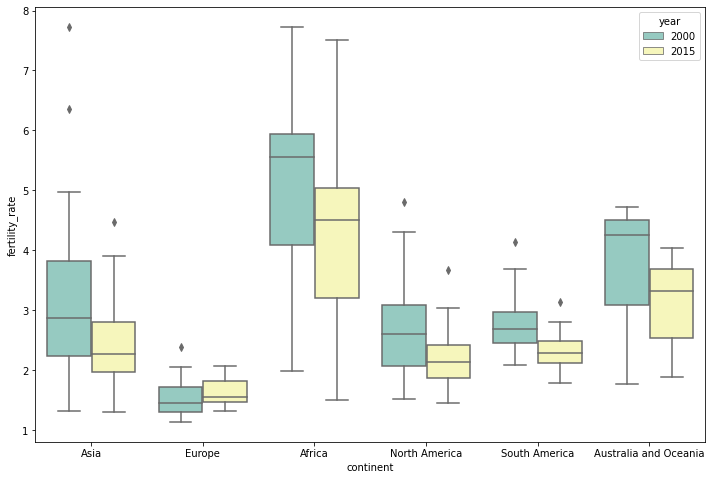

In [44]:
# World Fertility Rate Chart 2000 vs 2015

plt.figure(figsize=(12,8))

sns.boxplot(x='continent', y="fertility_rate", hue="year", data=df_00_15, palette="Set3")

<AxesSubplot:xlabel='continent', ylabel='life expectancy'>

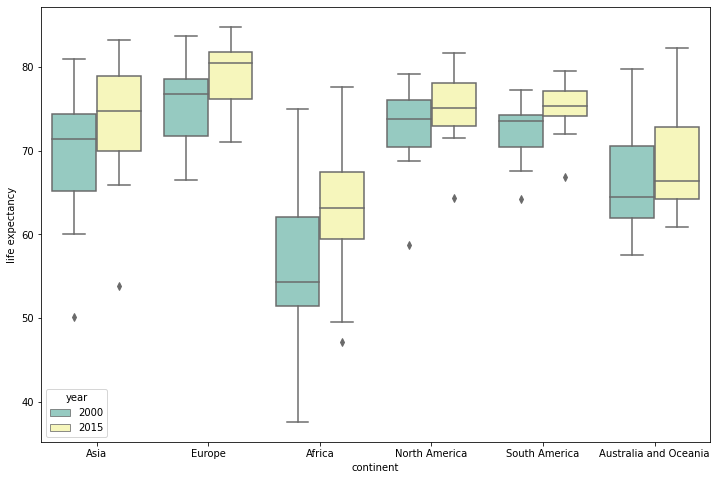

In [21]:
# World Life Expectancy Chart 2000 vs 2015

plt.figure(figsize=(12,8))
sns.boxplot(x='continent', y="life expectancy", hue="year",data=df_00_15, palette="Set3")

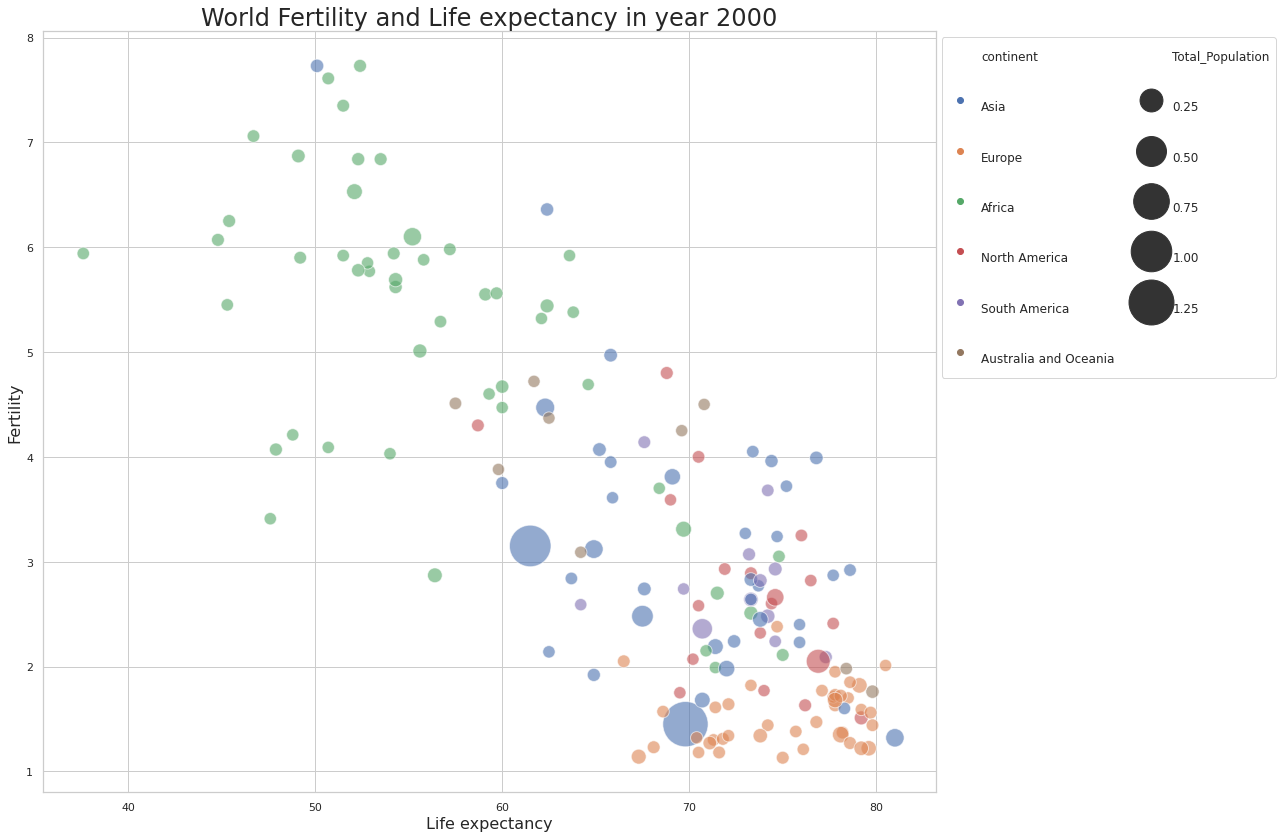

In [165]:
#Step 3: Dynamic Analysis with Animation : World Life expectancy and Fertility rate across time 

#Note: this code was written based on the following tutorials:
#https://www.python-graph-gallery.com/340-scatterplot-animation
#https://www.python-graph-gallery.com/341-python-gapminder-animation


# First, create the chart for one year

df_subset = df.loc[df['year'] == 2000]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(16,14))

ax = sns.scatterplot(x='life expectancy', y='fertility_rate',
                size ='Total_Population',
                sizes=(150,2050),
                hue='continent',
                #legend = False,
                data=df_subset, 
                alpha=0.6)

plt.title('World Fertility and Life expectancy in year 2000', fontsize=24)

plt.xlabel('Life expectancy', fontsize=16)

plt.ylabel('Fertility', fontsize=16)

# Locate the legend outside of the plot

plt.legend(bbox_to_anchor=(1, 1)
           , loc='upper left'
           , fontsize=12
           , borderpad=0.5
           , labelspacing = 2
           , ncol=2
           , handleheight = 3
          
          )



In [ ]:
# Second, write a loop that creates a chart for every year 

df_subset = df[(df['year'] >= 2000)]
df_subset.head(5)

dpi=96

for i in df_subset['year']:
    plt.ioff()
    
    fig = plt.figure(figsize=(680/dpi, 480/dpi), dpi=dpi)
        
    df_subset = df.loc[df['year'] == i]


    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12,8))
    ax = sns.scatterplot(x='life expectancy', y='fertility_rate',
                    size ='Total_Population',
                    sizes=(150,2050),
                    hue='continent',
                    #legend = False,
                    data=df_subset, 
                    alpha=0.6)
    plt.title('Year '+str(i), fontsize=20)
    plt.xlabel('Life expectancy', fontsize=16)
    plt.ylabel('Fertility', fontsize=16)

    # Locate the legend outside of the plot
    plt.legend(bbox_to_anchor=(1 , 1), loc='upper left', fontsize=10)


    #plt.show()
    filename= 'lifeexp_'+str(i)+'.png'
    plt.savefig(fname=filename, dpi=96)
    plt.gca()
    plt.close(fig)
    plt.close('all')
    

In [ ]:
# Third, we save the pictures from the previous loop and create a gif animation  
        
images = []

for i in df_1960_2015['year']:
    filename = 'lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=20)